In [12]:
import numpy as np, pandas as pd, pandas_read_xml as pdx
import xml.etree.ElementTree as et 



In [15]:
def parse_XML(xml_file, df_cols): 
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        res.append(node.attrib.get(df_cols[0]))
        for el in df_cols[1:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

In [20]:
AndroidBadges = pd.read_csv("AndroidBadges.csv")
AndroidComments = pd.read_csv("AndroidComments.csv")
AndroidPostHistory = pd.read_csv("AndroidPostHistory.csv")
AndroidPostLinks = pd.read_csv("AndroidPostLinks.csv")
AndroidPosts = pd.read_csv("AndroidPosts.csv")
AndroidUsers = pd.read_csv("AndroidUsers.csv")
AndroidVotes = pd.read_csv("AndroidVotes.csv")

AppleBadges = pd.read_csv("AppleBadges.csv")
AppleComments = pd.read_csv("AppleComments.csv")
ApplePostHistory = pd.read_csv("ApplePostHistory.csv")
ApplePostLinks = pd.read_csv("ApplePostLinks.csv")
ApplePosts = pd.read_csv("ApplePosts.csv")
AppleUsers = pd.read_csv("AppleUsers.csv")
AppleVotes = pd.read_csv("AppleVotes.csv")

WindowsPhoneBadges = pd.read_csv("WindowsPhoneBadges.csv")
WindowsPhoneComments = pd.read_csv("WindowsPhoneComments.csv")
WindowsPhonePostHistory = pd.read_csv("WindowsPhonePostHistory.csv")
WindowsPhonePostLinks = pd.read_csv("WindowsPhonePostLinks.csv")
WindowsPhonePosts = pd.read_csv("WindowsPhonePosts.csv")
WindowsPhoneUsers = pd.read_csv("WindowsPhoneUsers.csv")
WindowsPhoneVotes = pd.read_csv("WindowsPhoneVotes.csv")

AndroidPyt1 = pd.read_csv("AndroidPyt1.csv")
AndroidPyt2 = pd.read_csv("AndroidPyt2.csv")
AndroidPyt3 = pd.read_csv("AndroidPyt3.csv")
AndroidPyt4 = pd.read_csv("AndroidPyt4Model.csv")

ApplePyt1 = pd.read_csv("ApplePyt1.csv")
ApplePyt2 = pd.read_csv("ApplePyt2.csv")
ApplePyt3 = pd.read_csv("ApplePyt3.csv")
ApplePyt4 = pd.read_csv("ApplePyt4Model.csv")

WindowsPhonePyt1 = pd.read_csv("WindowsPhonePyt1.csv")
WindowsPhonePyt2 = pd.read_csv("WindowsPhonePyt2.csv")
WindowsPhonePyt3 = pd.read_csv("WindowsPhonePyt3.csv")
WindowsPhonePyt4 = pd.read_csv("WindowsPhonePyt4Model.csv")

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
import glob
from pathlib import Path
import re
from skimage import color, exposure
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


In [22]:
WindowsPhonePyt4 = pd.read_csv("WindowsPhonePyt4Model.csv")
ApplePyt4 = pd.read_csv("ApplePyt4Model.csv")
AndroidPyt4 = pd.read_csv("AndroidPyt4Model.csv")

In [26]:
def check_if_na_present(df):
    print(df.shape)
    tab = []
    for it in df.index:
        tab.append(df.loc[it].isna().sum().sum())
    np.unique(np.array(tab),return_counts = True)
    plt.hist(tab, bins=100)

(16660, 5)


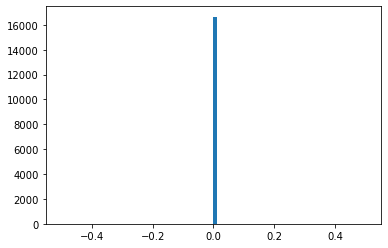

In [27]:
check_if_na_present(WindowsPhonePyt4)

(315088, 5)


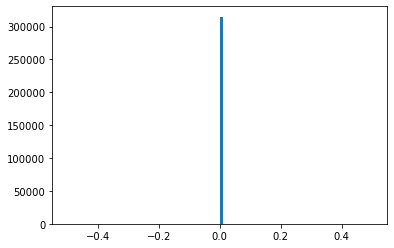

In [28]:
check_if_na_present(ApplePyt4)


(240379, 5)


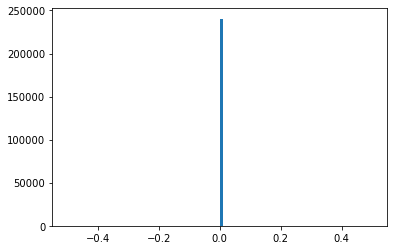

In [29]:
check_if_na_present(AndroidPyt4)

In [36]:
AndroidPyt4["UpVotes"].dtypes

dtype('int64')

In [37]:
AndroidPyt4["UpVotes"].max()

4626

In [38]:
ApplePyt4["UpVotes"].max()

23559

In [39]:
WindowsPhonePyt4["UpVotes"].max()

1837

In [41]:
print(AndroidPyt4["Reputation"].max())
print(ApplePyt4["Reputation"].max())
print(WindowsPhonePyt4["Reputation"].max())

86514
202751
9839


In [42]:
def switch_to_int32(df):
    for col in df.columns:
        if df[col].dtypes == 'int64':
            df[col] = df[col].astype('int32')

In [46]:
switch_to_int32(AndroidPyt4)
switch_to_int32(ApplePyt4)
switch_to_int32(WindowsPhonePyt4)
AndroidPyt4.info()
ApplePyt4.info()
WindowsPhonePyt4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240379 entries, 0 to 240378
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   month       240379 non-null  int32
 1   year        240379 non-null  int32
 2   Id          240379 non-null  int32
 3   UpVotes     240379 non-null  int32
 4   Reputation  240379 non-null  int32
dtypes: int32(5)
memory usage: 4.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315088 entries, 0 to 315087
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   month       315088 non-null  int32
 1   year        315088 non-null  int32
 2   Id          315088 non-null  int32
 3   UpVotes     315088 non-null  int32
 4   Reputation  315088 non-null  int32
dtypes: int32(5)
memory usage: 6.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16660 entries, 0 to 16659
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dty

In [49]:
AndroidPyt4.isna().sum()

month         0
year          0
Id            0
UpVotes       0
Reputation    0
dtype: int64

In [48]:
ApplePyt4.isna().sum()

month         0
year          0
Id            0
UpVotes       0
Reputation    0
dtype: int64

In [50]:
WindowsPhonePyt4.isna().sum()

month         0
year          0
Id            0
UpVotes       0
Reputation    0
dtype: int64

In [51]:
AndroidPyt4.drop_duplicates(inplace = True)
ApplePyt4.drop_duplicates(inplace = True)
WindowsPhonePyt4.drop_duplicates(inplace = True)

In [56]:
!pip install scikit-plot
!pip install catboost
!pip install eli5
!pip install xgboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=1d816449a3225950d784bf6e933845ebcf0ecb003fd9ae9b7a10f0441ea8404a
  Stored in directory: c:\users\alekm\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [61]:
!pip install lightgbm

In [63]:
!pip install hyperopt

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

import scikitplot as skplt
from scikitplot.estimators import plot_learning_curve
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import  roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

import xgboost as xgb
import lightgbm as lgb
import catboost as ctb

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
import glob

from skimage import color, exposure


from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from scipy.stats import uniform

from functools import partial
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

import re
import eli5
from eli5.sklearn import PermutationImportance

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVC


In [67]:
from sklearn.ensemble import AdaBoostRegressor

In [65]:
metrics = {
    'accuracy': accuracy_score,
    'recall': recall_score,
    'precision': precision_score,
    'f1_score': f1_score,
    'roc_auc': roc_auc_score,
}

models = {
    'LGR': LogisticRegression(solver = 'lbfgs', random_state=42, verbose=0),
    'DTR': DecisionTreeRegressor(random_state=42),
    'RFR': RandomForestRegressor(random_state=42),
    'ETR': ExtraTreesRegressor(random_state=42),
    'XGB': xgb.XGBRegressor(random_state=42),
    'LGBM': lgb.LGBMRegressor(random_state=42)
}


In [68]:
def train_model(model,X,y):
    model.fit(X,y)
    return model

In [69]:
def predict_model(model,X):
    y_pred = model.predict(X)
    return y_pred

In [70]:
def score_mdoel(y_test,y_pred,scoring):
    score = scoring(y_test,y_pred,average = 'micro')
    return score

In [71]:
def train_and_predict(model,X,y,scoring):
    scores = cross_val_score(model,X,y,cv = 3, scoring = scoring)
    return np.mean(scores),np.std(scores)

In [72]:
def split_data(df):
    features = [feature for feature in df.columns if feature != 'Reputation']
    X = df[features]
    y = df['Reputation']
    return X,y


In [73]:
def run_model(model, df, scoring):
    df = df.sample(frac = 0.1)
    X,y = split_data(df)
    print(y.facttorize())
    y = y.factorize()[0]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify=y)
    model = train_model(model,X_train,y_train)
    y_pred = predict_model(model,X_test)
    accuracy = accuracy_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='micro')
    f1 = f1_score(y_test,y_pred,average='micro')
    print(y_pred,'\n')
    print('accuracy: ', accuracy)
    print('recall: ',recall)
    print('precision: ', precision)
    print('f1_micro: ', f1)
    plot_confusion_matrix(model,X_test,y_test,cmap='Blues')
    plt.show()
    plot_learning_curve(model,X_test,y_test,scoring = 'f1_micro')
    plt.show()

In [ ]:
for model in models.items():
    print(model[0])
    run_model(model[1],WindowsPhonePyt4,metrics['f1_score'])
    imp = PermutationImportance(model, random_state = 42).fit(X_train, y_train)
    eli5.show_weights(imp, feature_names = X_train.columns.values, top = 50)